Linear Regression 
=========================

## Optimisation Techniques - Part 2

*This notebook describes some of the Optimisation techniques used in practise for Machine Learning*

* Momentum
* Nesterov Accelerated Gradient


### Import libraries 
We will mostly be using numpy for mathematical operations and matplotlib to produce plots 

In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
# Generate some data
num_points = 500
x_data,y_data = [],[]

# Define theta parameters for producing test data 
t0,t1 = 0.4,0.2

for i in xrange(num_points):
    x = np.random.normal(0.0,0.55)
    y = t0 + (x * t1) + np.random.normal(0.0,0.03)
    x_data.append(x)
    y_data.append(y)

### Define Parameters

In [3]:
# size of dataset
m = np.shape(x_data)[0]
# Generate the feature matrix
X = np.column_stack((np.ones(m),x_data)) 
# Initialise theta vector
theta = np.array(np.zeros(2))

### Cost Function

In [4]:
def Cost(X,theta,m,y):

    h = np.dot(X,theta)
    S = np.sum((h - np.transpose(y))**2)
    J = S / (m) # or 2*m

    return J

### Stochastic Gradient Descent (SGD)

In [5]:
def SGD_hist(X,y,theta,alpha,iterations,m):

    Jhist = np.zeros(((iterations*m)+2,1))
    Jhist[0] = Cost(X,theta,m,y)
    for i in xrange(iterations):
        for sample in xrange(m): 

            h = np.dot(X[sample,:],theta)
            errors = h - y[sample]  
            theta_change = alpha * np.dot(np.transpose(X[sample,:]),errors)
            theta = theta -theta_change 

            Jhist[(i*m)+sample+1] = Cost(X,theta,m,y)

    return theta,Jhist

### Alternative Optimisation Techniques:
#### Momentum

SGD updates parameters more frequently than BGD allowing for faster convergence with fewer iterations on the input training data. One problem that it still suffers from is the fact that it can have trouble navigating the cost surface due to variations in steepness across dimensions. This causes optimisation to take a long zig-zagged route to the local minimum. 

Momentum aims to take a more direct path to the local minimum by taking into account the previous update.  It does this by adding a fraction $\lambda$ of the update vector from the previous time step to the current update vector. SGD with Momentum can be given by:

$v_t = \lambda v_{t-1} + \alpha . \nabla_\theta J(\theta,x^i,y^i) $,

$\theta =  \theta - v_t$,

where $\lambda$ is typically given the value of $0.9$.

Effectively, as the cost surface is navigated, momentum is built up in the direction of the greatest gradient. 

In [20]:
def SGDMom_hist(X,y,theta,alpha,iterations,m,Lambda=0.9):

    Jhist = np.zeros(((iterations*m)+2,1))
    Jhist[0] = Cost(X,theta,m,y)
    v = 0
    for i in xrange(iterations):
        for sample in xrange(m): 

            h = np.dot(X[sample,:],theta)
            errors = h - y[sample]  
            v = (Lambda*v) + (alpha * np.dot(np.transpose(X[sample,:]),errors))
            theta = theta - v 

            Jhist[(i*m)+sample+1] = Cost(X,theta,m,y)

    return theta,Jhist

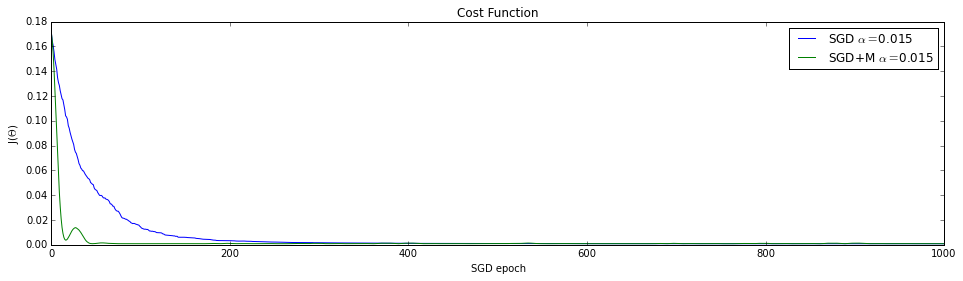

In [21]:
alpha_SGD = 0.015
alpha_SGDMom = 0.015
# No. iterations for Gradient Descent
iterations = 2

fig = plt.figure(figsize=(16, 4),facecolor='w', edgecolor='k')

# Initialise theta vector
theta_SGD = np.array(np.zeros(2)) 
theta_SGDMom = np.array(np.zeros(2))
# Run Gradient Descent
theta_SGD,Jhist_SGD       = SGD_hist(X,y_data,theta_SGD,alpha_SGD,iterations,m)
theta_SGDMom,Jhist_SGDMom = SGDMom_hist(X,y_data,theta_SGDMom,alpha_SGDMom,iterations,m)

plt.plot(xrange(Jhist_SGD.size), Jhist_SGD, linewidth=1, label="".join(("SGD $ \\alpha=$", str(alpha_SGD) )) )
plt.plot(xrange(Jhist_SGDMom.size), Jhist_SGDMom, linewidth=1, label="".join(("SGD+M $ \\alpha=$", str(alpha_SGDMom) )) )

plt.title("Cost Function")
plt.xlabel('SGD epoch')
plt.ylabel('J($\Theta$)')
plt.legend()
#plt.ylim((0,0.18))
plt.xlim((0,iterations*m))

plt.show()

In [8]:
cost_SGD = Cost(X,theta_SGD,m,y_data)
cost_SGDMom = Cost(X,theta_SGDMom,m,y_data)
print "Number of iterations: ", iterations
print "SGD theta: ", theta_SGD, " SGD cost: ", cost_SGD
print "SGD+M theta: ", theta_SGDMom, " SGD+M cost: ", cost_SGDMom

Number of iterations:  2
SGD theta:  [ 0.39756601  0.193434  ]  SGD cost:  0.000907839322395
SGD+M theta:  [ 0.39945009  0.20455776]  SGD+M cost:  0.000883433869079


#### Nesterov Accelerated Gradient

$v_t = \lambda v_{t-1} + \alpha . \nabla_\theta J(\theta - \lambda v_{t-1},x^i,y^i) $,

$\theta =  \theta - v_t$,

In [9]:
def SGD_NMom_hist(X,y,theta,alpha,iterations,m,Lambda=0.9):

    Jhist = np.zeros(((iterations*m)+2,1))
    Jhist[0] = Cost(X,theta,m,y)
    v = 0
    for i in xrange(iterations):
        for sample in xrange(m): 

            h = np.dot(X[sample,:],np.subtract(theta,(Lambda*v)))
            errors = h - y[sample]  
            v = (Lambda*v) + (alpha * np.dot(np.transpose(X[sample,:]),errors))
            theta = theta - v 

            Jhist[(i*m)+sample+1] = Cost(X,theta,m,y)

    return theta,Jhist

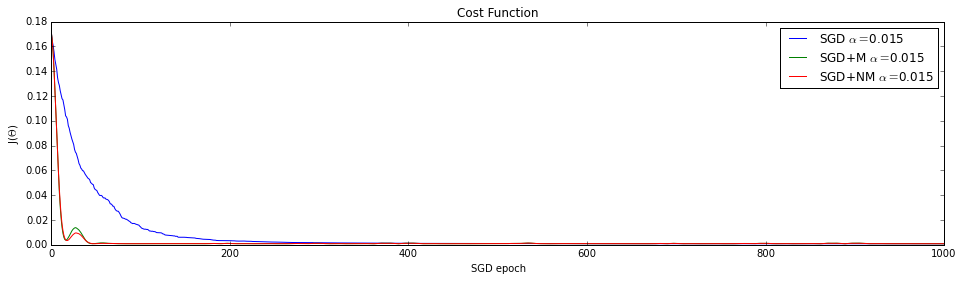

In [17]:
alpha_SGD_NMom = 0.015
# No. iterations for Gradient Descent
iterations = 2

fig = plt.figure(figsize=(16, 4),facecolor='w', edgecolor='k')

# Initialise theta vector
theta_SGD_NMom = np.array(np.zeros(2))
# Run Gradient Descent
theta_SGD_NMom,Jhist_SGD_NMom = SGD_NMom_hist(X,y_data,theta_SGD_NMom,alpha_SGD_NMom,iterations,m)

plt.plot(xrange(Jhist_SGD.size), Jhist_SGD, linewidth=1, label="".join(("SGD $ \\alpha=$", str(alpha_SGD) )) )
plt.plot(xrange(Jhist_SGDMom.size), Jhist_SGDMom, linewidth=1, label="".join(("SGD+M $ \\alpha=$", str(alpha_SGDMom) )) )
plt.plot(xrange(Jhist_SGD_NMom.size), Jhist_SGD_NMom, linewidth=1, label="".join(("SGD+NM $ \\alpha=$", str(alpha_SGD_NMom) )) )

plt.title("Cost Function")
plt.xlabel('SGD epoch')
plt.ylabel('J($\Theta$)')
plt.legend()
#plt.ylim((0,0.18))
plt.xlim((0,iterations*m))

plt.show()

The cost surface with a single feature and highly linear data points is easy to navigate to the local minimum. This is why Nesterov Accelerated Gradient only provides a slight improvement over Momentum for this example. 